In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np

data=np.load('/content/drive/My Drive/FaceMask Detect/data.npy')
target=np.load('/content/drive/My Drive/FaceMask Detect/target.npy')

#loading the save numpy arrays in the previous code

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 1009 samples, validate on 253 samples
Epoch 1/20
1009/1009 [==============================] - 42s 41ms/step - loss: 0.7723 - accuracy: 0.5233 - val_loss: 0.6923 - val_accuracy: 0.5178
Epoch 2/20
1009/1009 [==============================] - 42s 41ms/step - loss: 0.6620 - accuracy: 0.5669 - val_loss: 0.5886 - val_accuracy: 0.6798
Epoch 3/20
1009/1009 [==============================] - 42s 41ms/step - loss: 0.5522 - accuracy: 0.7136 - val_loss: 0.4692 - val_accuracy: 0.7945
Epoch 4/20
1009/1009 [==============================] - 42s 42ms/step - loss: 0.4193 - accuracy: 0.8176 - val_loss: 0.3899 - val_accuracy: 0.7984
Epoch 5/20
1009/1009 [==============================] - 42s 42ms/step - loss: 0.3522 - accuracy: 0.8454 - val_loss: 0.3070 - val_accuracy: 0.8972
Epoch 6/20
1009/1009 [==============================] - 42s 42ms/step - loss: 0.2844 - accuracy: 0.8870 - val_loss: 0.3565 - val_accuracy: 0.8498
Epoch 7/20
1009/1009 [==============================] - 46s 45ms/step - loss:

In [20]:
model.save("/content/drive/My Drive/FaceMask Detect/model.h5")

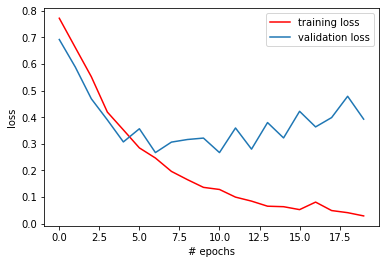

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

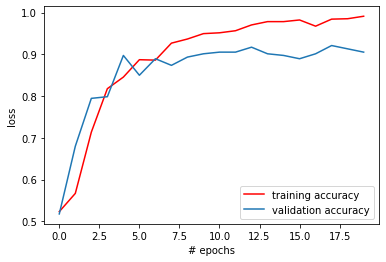

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

316/316 [==============================] - 4s 12ms/step
[0.5106034316594088, 0.8702531456947327]
